In [2]:
import warnings
warnings.filterwarnings('ignore')
import math
from scipy.signal import correlate


In [ ]:
import sys

!{sys.executable} -m pip install matplotlib numpy scipy pynwb
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
from math import sqrt
from scipy import interpolate
from pynwb import NWBHDF5IO


[notice] A new release of pip is available: 25.0.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
path = r"E:\2025\25-2랩\Coding project\sub-619296_ses-1187930705_ogen.nwb"
io = NWBHDF5IO(path, 'r')
nwb = io.read()

# Extract spike train from units in region

In [4]:
units = nwb.units

In [ ]:
channel_probes = {}

electrodes = nwb.electrodes
for i in range(len(electrodes)):
    channel_id = electrodes["id"][i]
    location = electrodes["location"][i]
    channel_probes[channel_id] = location

print(len(channel_probes))
print(channel_probes)
print(electrodes.colnames)
print(electrodes["id"][:])
print(len(electrodes["id"]))
print(electrodes["group_name"][:])
print(len(electrodes["group_name"][:]))



2304
{0: 'MB', 1: 'MB', 2: 'MB', 3: 'MB', 4: 'MB', 5: 'MB', 6: 'MB', 7: 'MB', 8: 'MB', 9: 'MB', 10: 'MB', 11: 'MB', 12: 'MB', 13: 'MB', 14: 'PPT', 15: 'PPT', 16: 'PPT', 17: 'PPT', 18: 'PPT', 19: 'PPT', 20: 'PPT', 21: 'PPT', 22: 'PPT', 23: 'PPT', 24: 'PPT', 25: 'PPT', 26: 'PPT', 27: 'PPT', 28: 'PPT', 29: 'PPT', 30: 'PPT', 31: 'PPT', 32: 'PPT', 33: 'PPT', 34: 'PPT', 35: 'PPT', 36: 'PPT', 37: 'NOT', 38: 'NOT', 39: 'NOT', 40: 'NOT', 41: 'NOT', 42: 'NOT', 43: 'NOT', 44: 'NOT', 45: 'NOT', 46: 'NOT', 47: 'NOT', 48: 'NOT', 49: 'NOT', 50: 'NOT', 51: 'NOT', 52: 'NOT', 53: 'NOT', 54: 'NOT', 55: 'NOT', 56: 'NOT', 57: 'NOT', 58: 'NOT', 59: 'NOT', 60: 'NOT', 61: 'NOT', 62: 'NOT', 63: 'NOT', 64: 'NOT', 65: 'NOT', 66: 'NOT', 67: 'NOT', 68: 'NOT', 69: 'NOT', 70: 'NOT', 71: 'NOT', 72: 'NOT', 73: 'NOT', 74: 'NOT', 75: 'NOT', 76: 'NOT', 77: 'NOT', 78: 'NOT', 79: 'NOT', 80: 'NOT', 81: 'NOT', 82: 'NOT', 83: 'HPF', 84: 'HPF', 85: 'HPF', 86: 'HPF', 87: 'SUB', 88: 'SUB', 89: 'SUB', 90: 'SUB', 91: 'SUB', 92: 'S

In [20]:
probes = np.unique(electrodes["group_name"])
ids = np.array(electrodes["id"])
groups = np.array(electrodes["group_name"])
regions = np.array(electrodes["location"])
uniq = np.unique(regions)
print(probes)
idx_by_group = {g : ids[groups == g] for g in probes}
idx_by_regions = {r : ids[regions == r] for r in uniq}
print(uniq)
print(len(idx_by_regions.get("VISp2/3")))
print(idx_by_regions.get("VISp2/3"))
#print(idx_by_group)
print(len(idx_by_group.get("probeA")))

['probeA' 'probeB' 'probeC' 'probeD' 'probeE' 'probeF']
['APN' 'CA1' 'CA3' 'DG-mo' 'DG-po' 'DG-sg' 'ENTm2' 'ENTm3' 'ENTm5' 'ENTm6'
 'HPF' 'LP' 'MB' 'MGd' 'MGm' 'NOT' 'PAR' 'POL' 'POST' 'PPT' 'PoT' 'ProS'
 'SCig' 'SGN' 'SUB' 'TH' 'VISal1' 'VISal2/3' 'VISal4' 'VISal5' 'VISal6a'
 'VISal6b' 'VISam1' 'VISam2/3' 'VISam4' 'VISam5' 'VISam6a' 'VISam6b'
 'VISl1' 'VISp1' 'VISp2/3' 'VISp4' 'VISp5' 'VISp6a' 'VISp6b' 'VISpm1'
 'VISpm2/3' 'VISpm4' 'VISpm5' 'VISpm6a' 'VISpm6b' 'VISrl1' 'VISrl2/3'
 'VISrl4' 'VISrl5' 'VISrl6a' 'VISrl6b' 'root']
32
[2257 2258 2259 2260 2261 2262 2263 2264 2265 2266 2267 2268 2269 2270
 2271 2272 2273 2274 2275 2276 2277 2278 2279 2280 2281 2282 2283 2284
 2285 2286 2287 2288]
384


In [7]:
def get_unit_location(row):
    return channel_probes[int(row.peak_channel_id)]

print(set(get_unit_location(row) for row in units))

{'VISam6a', 'VISpm6b', 'VISrl4', 'VISpm5', 'CA1', 'VISal2/3', 'DG-po', 'VISam2/3', 'VISrl1', 'MGm', 'DG-sg', 'SGN', 'APN', 'ENTm5', 'VISrl6a', 'VISrl5', 'PoT', 'NOT', 'VISal4', 'VISal6b', 'ENTm2', 'VISpm2/3', 'CA3', 'VISal5', 'VISp6a', 'VISam4', 'SUB', 'PPT', 'VISal6a', 'ENTm6', 'VISrl6b', 'VISpm6a', 'VISrl2/3', 'PAR', 'VISp1', 'VISl1', 'VISp2/3', 'POL', 'HPF', 'VISp5', 'MGd', 'VISp6b', 'LP', 'root', 'SCig', 'VISpm4', 'MB', 'ENTm3', 'DG-mo', 'VISp4', 'TH', 'VISam5'}


In [8]:

brain_regions = ["VISp2/3"]
# select units based if they have 'good' quality and exists in one of the specified brain_regions
units_spike_times = []
units_ids = []
for location in brain_regions:
    location_units_spike_times = []
    for row in units:
        if get_unit_location(row) == location and row.quality.item() == "good":
            location_units_spike_times.append(row.spike_times.item())
            units_ids.append(row)
    units_spike_times += location_units_spike_times
print(len(units_spike_times))

73


In [9]:
print(len(units_spike_times))
print(len(units_spike_times[0]))
print(len(units_spike_times[1]))
print(len(units_spike_times[29]))
print(units_ids[29]['cluster_id'])

73
75602
128548
10141
id
797    256
Name: cluster_id, dtype: int64


# PSTH for all period

In [10]:
def extract_epochs(stim_name, stim_table, epochs):
    
    # specify a current epoch stop and start time
    epoch_start = stim_table.start_time[0]
    epoch_stop = stim_table.stop_time[0]

    # for each row, try to extend current epoch stop_time
    for i in range(len(stim_table)):
        this_block = stim_table.stimulus_block[i]
        # if end of table, end the current epoch
        if i+1 >= len(stim_table):
            epochs.append((stim_name, this_block, epoch_start, epoch_stop))
            break
            
        next_block = stim_table.stimulus_block[i+1]
        # if next row is the same stim block, push back epoch_stop time
        if next_block == this_block:
            epoch_stop = stim_table.stop_time[i+1]
        # otherwise, end the current epoch, start new epoch
        else:
            epochs.append((stim_name, this_block, epoch_start, epoch_stop))
            epoch_start = stim_table.start_time[i+1]
            epoch_stop = stim_table.stop_time[i+1]
    
    return epochs

In [11]:
epochs = []
for stim_name in nwb.intervals.keys():
    stim_table = nwb.intervals[stim_name]
    try:
        epochs = extract_epochs(stim_name, stim_table, epochs)
    except:
        continue

# manually add optotagging epoch since the table is stored separately
opto_stim_table = nwb.processing["optotagging"]["optogenetic_stimulation"]
opto_epoch = ("optogenetic_stimulation", 1.0, opto_stim_table.start_time[0], opto_stim_table.stop_time[-1])
epochs.append(opto_epoch)

# epochs take the form (stimulus name, stimulus block, start time, stop time)
print(len(epochs))
epochs.sort(key=lambda x: x[2])
for epoch in epochs:
    print(epoch)

7
('ICwcfg1_presentations', 0.0, 62.28759, 4353.8951)
('ICwcfg0_presentations', 1.0, 4666.15762, 5218.6221)
('ICkcfg1_presentations', 2.0, 5226.62883, 5779.09334)
('ICkcfg0_presentations', 3.0, 5787.10007, 6339.56459)
('RFCI_presentations', 4.0, 6347.62139, 6527.82286)
('sizeCI_presentations', 5.0, 6557.88152, 7278.13709)
('optogenetic_stimulation', 1.0, 7314.15612, 8924.19439)


In [12]:
time_start = math.floor(min([epoch[2] for epoch in epochs]))
time_end = math.ceil(max([epoch[3] for epoch in epochs]))
all_units_spike_times = np.concatenate(units_spike_times).ravel()
print(time_start, time_end)

# make histogram of unit spikes per second over specified timeframe
time_bin_edges = np.linspace(time_start, time_end, (time_end-time_start))
hist, bins = np.histogram(all_units_spike_times, bins=time_bin_edges)

62 8925


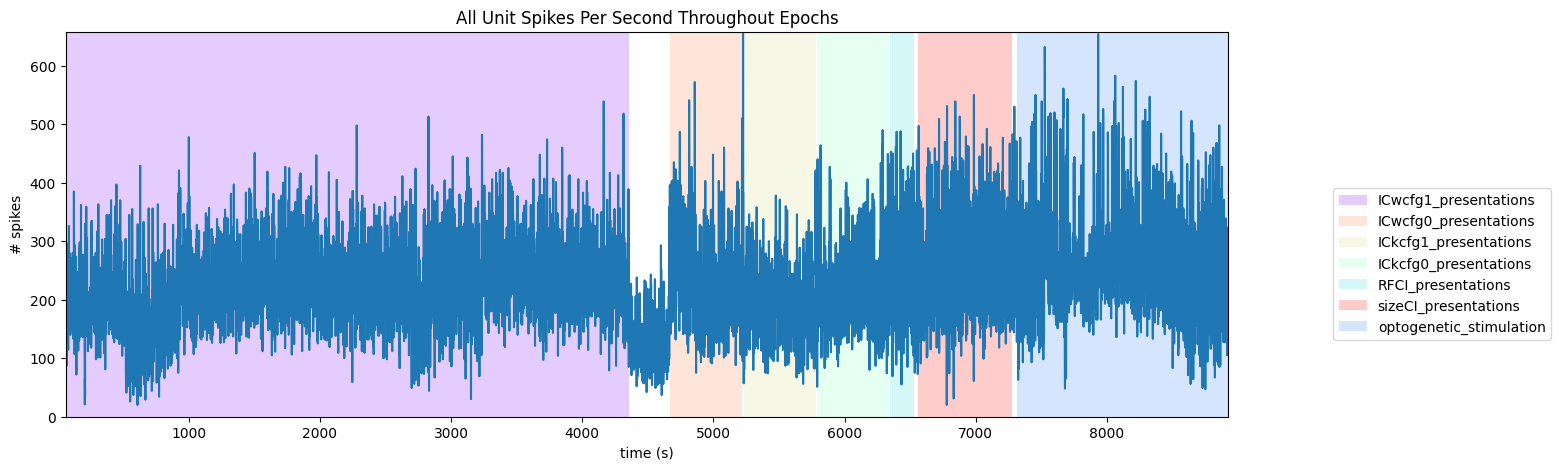

In [13]:
# generate plot of spike histogram with colored epoch intervals and legend
fig, ax = plt.subplots(figsize=(15,5))

# assign unique color to each stimulus name
stim_names = list({epoch[0] for epoch in epochs})
colors = plt.cm.rainbow(np.linspace(0,1,len(stim_names)))
stim_color_map = {stim_names[i]:colors[i] for i in range(len(stim_names))}

epoch_key = {}
height = max(hist)
# draw colored rectangles for each epoch
for epoch in epochs:
    stim_name, stim_block, epoch_start, epoch_end = epoch
    color = stim_color_map[stim_name]
    rec = ax.add_patch(mpl.patches.Rectangle((epoch_start, 0), epoch_end-epoch_start, height, alpha=0.2, facecolor=color))
    epoch_key[stim_name] = rec
    
ax.set_xlim(time_start, time_end)
ax.set_ylim(-0.1, height+0.1)
ax.set_xlabel("time (s)")
ax.set_ylabel("# spikes")
ax.set_title("All Unit Spikes Per Second Throughout Epochs")

fig.legend(epoch_key.values(), epoch_key.keys(), loc="lower right", bbox_to_anchor=(1.12, 0.25))
ax.plot(bins[:-1], hist)

# Extract stim times

In [14]:
stim_table = nwb.intervals["ICwcfg1_presentations"]
print(stim_table.colnames)
stim_table[:10]

('start_time', 'stop_time', 'stimulus_name', 'stimulus_block', 'frame', 'stimulus_index', 'tags', 'timeseries')


,start_time,stop_time,stimulus_name,stimulus_block,frame,stimulus_index,tags,timeseries
id,,,,,,,,
0,62.28759,62.68790,ICwcfg1,0.0,0.0,0.0,[stimulus_time_interval],"[(1, 1, timestamps pynwb.base.TimeSeries at 0x..."
1,62.68790,63.08826,ICwcfg1,0.0,0.0,0.0,[stimulus_time_interval],"[(2, 1, timestamps pynwb.base.TimeSeries at 0x..."
2,63.08826,63.48854,ICwcfg1,0.0,0.0,0.0,[stimulus_time_interval],"[(3, 1, timestamps pynwb.base.TimeSeries at 0x..."
3,63.48854,63.88894,ICwcfg1,0.0,0.0,0.0,[stimulus_time_interval],"[(4, 1, timestamps pynwb.base.TimeSeries at 0x..."
4,63.88894,64.28925,ICwcfg1,0.0,0.0,0.0,[stimulus_time_interval],"[(5, 1, timestamps pynwb.base.TimeSeries at 0x..."
5,64.28925,64.68962,ICwcfg1,0.0,0.0,0.0,[stimulus_time_interval],"[(6, 1, timestamps pynwb.base.TimeSeries at 0x..."
6,64.68962,65.08989,ICwcfg1,0.0,0.0,0.0,[stimulus_time_interval],"[(7, 1, timestamps pynwb.base.TimeSeries at 0x..."
7,65.08989,65.49022,ICwcfg1,0.0,0.0,0.0,[stimulus_time_interval],"[(8, 1, timestamps pynwb.base.TimeSeries at 0x..."
8,65.49022,65.89059,ICwcfg1,0.0,0.0,0.0,[stimulus_time_interval],"[(9, 1, timestamps pynwb.base.TimeSeries at 0x..."


In [15]:
control_stim_select = lambda row: row.frame.item() == 0.0
control_stim_times = [float(stim_table[i].start_time) for i in range(len(stim_table)) if control_stim_select(stim_table[i])]
print(len(control_stim_times))

5820


In [16]:
illusion_stim_select = lambda row: row.frame.item() == 3.0 # 3 = 14+16+19+21
illusion_stim_times = [float(stim_table[i].start_time) for i in range(len(stim_table)) if illusion_stim_select(stim_table[i])]
print(len(illusion_stim_times))



400


# Generating time matrix

In [17]:
# bin size for counting spikes
time_resolution = 0.005

# start and end times (relative to the stimulus at 0 seconds) that we want to examine and align spikes to
window_start_time = -0.25
window_end_time = 0.5

In [18]:
def get_spike_matrix(stim_times, units_spike_times, bin_edges):
    time_resolution = np.mean(np.diff(bin_edges))
    # 3D spike matrix to be populated with spike counts
    spike_matrix = np.zeros((len(units_spike_times), len(stim_times), len(bin_edges)-1))

    # populate 3D spike matrix for each unit for each stimulus trial by counting spikes into bins
    for unit_idx in range(len(units_spike_times)):
        spike_times = units_spike_times[unit_idx]

        for stim_idx, stim_time in enumerate(stim_times):
            # get spike times that fall within the bin's time range relative to the stim time        
            first_bin_time = stim_time + bin_edges[0]
            last_bin_time = stim_time + bin_edges[-1]
            first_spike_in_range, last_spike_in_range = np.searchsorted(spike_times, [first_bin_time, last_bin_time])
            spike_times_in_range = spike_times[first_spike_in_range:last_spike_in_range]

            # convert spike times into relative time bin indices
            bin_indices = ((spike_times_in_range - (first_bin_time)) / time_resolution).astype(int)
            
            # mark that there is a spike at these bin times for this unit on this stim trial
            for bin_idx in bin_indices:
                spike_matrix[unit_idx, stim_idx, bin_idx] += 1

    return spike_matrix

In [19]:
# time bins used
n_bins = int((window_end_time - window_start_time) / time_resolution)+1
bin_edges = np.linspace(window_start_time, window_end_time, n_bins, endpoint=True)

# calculate baseline and stimulus interval indices for use later
stimulus_onset_idx = int(-bin_edges[0] / time_resolution)

illusion_spike_matrix = get_spike_matrix(illusion_stim_times, units_spike_times, bin_edges)
control_spike_matrix = get_spike_matrix(control_stim_times, units_spike_times, bin_edges)

print(illusion_spike_matrix.shape)
print(control_spike_matrix.shape)
# (unit, trial, timebin)

(73, 400, 150)
(73, 5820, 150)


In [20]:
print(illusion_spike_matrix[0][0][:])
print(n_bins)
print(bin_edges)
print(len(bin_edges))
#[30] : 0~0.005s from stim.

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0.
 0. 0. 0. 0. 0. 0.]
151
[-0.25  -0.245 -0.24  -0.235 -0.23  -0.225 -0.22  -0.215 -0.21  -0.205
 -0.2   -0.195 -0.19  -0.185 -0.18  -0.175 -0.17  -0.165 -0.16  -0.155
 -0.15  -0.145 -0.14  -0.135 -0.13  -0.125 -0.12  -0.115 -0.11  -0.105
 -0.1   -0.095 -0.09  -0.085 -0.08  -0.075 -0.07  -0.065 -0.06  -0.055
 -0.05  -0.045 -0.04  -0.035 -0.03  -0.025 -0.02  -0.015 -0.01  -0.005
  0.     0.005  0.01   0.015  0.02   0.025  0.03   0.035  0.04   0.045
  0.05   0.055  0.06   0.065  0.07   0.075  0.08   0.085  0.09   0.095
  0.1    0.105  0.11   0.115  0.12   0.12

# Showing Response windows

In [21]:
def show_response(ax, window, window_start_time, window_end_time, aspect="auto", vmin=None, vmax=None, yticklabels=[], skipticks=1, xlabel="Time (s)", ylabel="ROI", cbar=True, cbar_label=None):
    if len(window) == 0:
        print("Input data has length 0; Nothing to display")
        return

    img = ax.imshow(window, aspect=aspect, extent=[window_start_time, window_end_time, 0, len(window)], interpolation="none", vmin=vmin, vmax=vmax)
    if cbar:
        ax.colorbar(img, shrink=0.5, label=cbar_label)

    ax.plot([0,0],[0, len(window)], ":", color="white", linewidth=1.0)

    if len(yticklabels) != 0:
        ax.set_yticks(range(len(yticklabels)))
        ax.set_yticklabels(yticklabels, fontsize=8)

        n_ticks = len(yticklabels[::skipticks])
        ax.yaxis.set_major_locator(plt.MaxNLocator(n_ticks))

    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)

In [22]:
def show_many_responses(windows, rows, cols, window_idxs=None, title=None, subplot_title="", xlabel=None, ylabel=None, cbar_label=None, vmin=0, vmax=2):
    if window_idxs is None:
        window_idxs = range(len(windows))
    windows = windows[window_idxs]
    
    # handle case with no input data
    if len(windows) == 0:
        print("Input data has length 0; Nothing to display")
        return
    # handle cases when there aren't enough windows for number of rows
    if len(windows) < rows*cols:
        rows = (len(windows) // cols) + 1

    fig, axes = plt.subplots(rows, cols, figsize=(2*cols, 3*rows), layout="constrained")
    # handle case when there's only one row
    if len(axes.shape) == 1:
        axes = axes.reshape((1, axes.shape[0]))

    for i in range(rows*cols):
        ax_row = int(i // cols)
        ax_col = i % cols
        ax = axes[ax_row][ax_col]
        
        if i > len(windows)-1:
            ax.set_visible(False)
            continue

        window = windows[i]
        show_response(ax, window, window_start_time, window_end_time, xlabel=xlabel, ylabel=ylabel, cbar=False, vmin=vmin, vmax=vmax)
        ax.set_title(f"{subplot_title} {window_idxs[i]}")
        if ax_row != rows-1:
            ax.get_xaxis().set_visible(False)
        if ax_col != 0:
            ax.get_yaxis().set_visible(False)

    fig.suptitle(title)
    norm = mpl.colors.Normalize(vmin=vmin, vmax=vmax)
    colorbar = fig.colorbar(mpl.cm.ScalarMappable(norm=norm), ax=axes, shrink=2/cols, label=cbar_label)

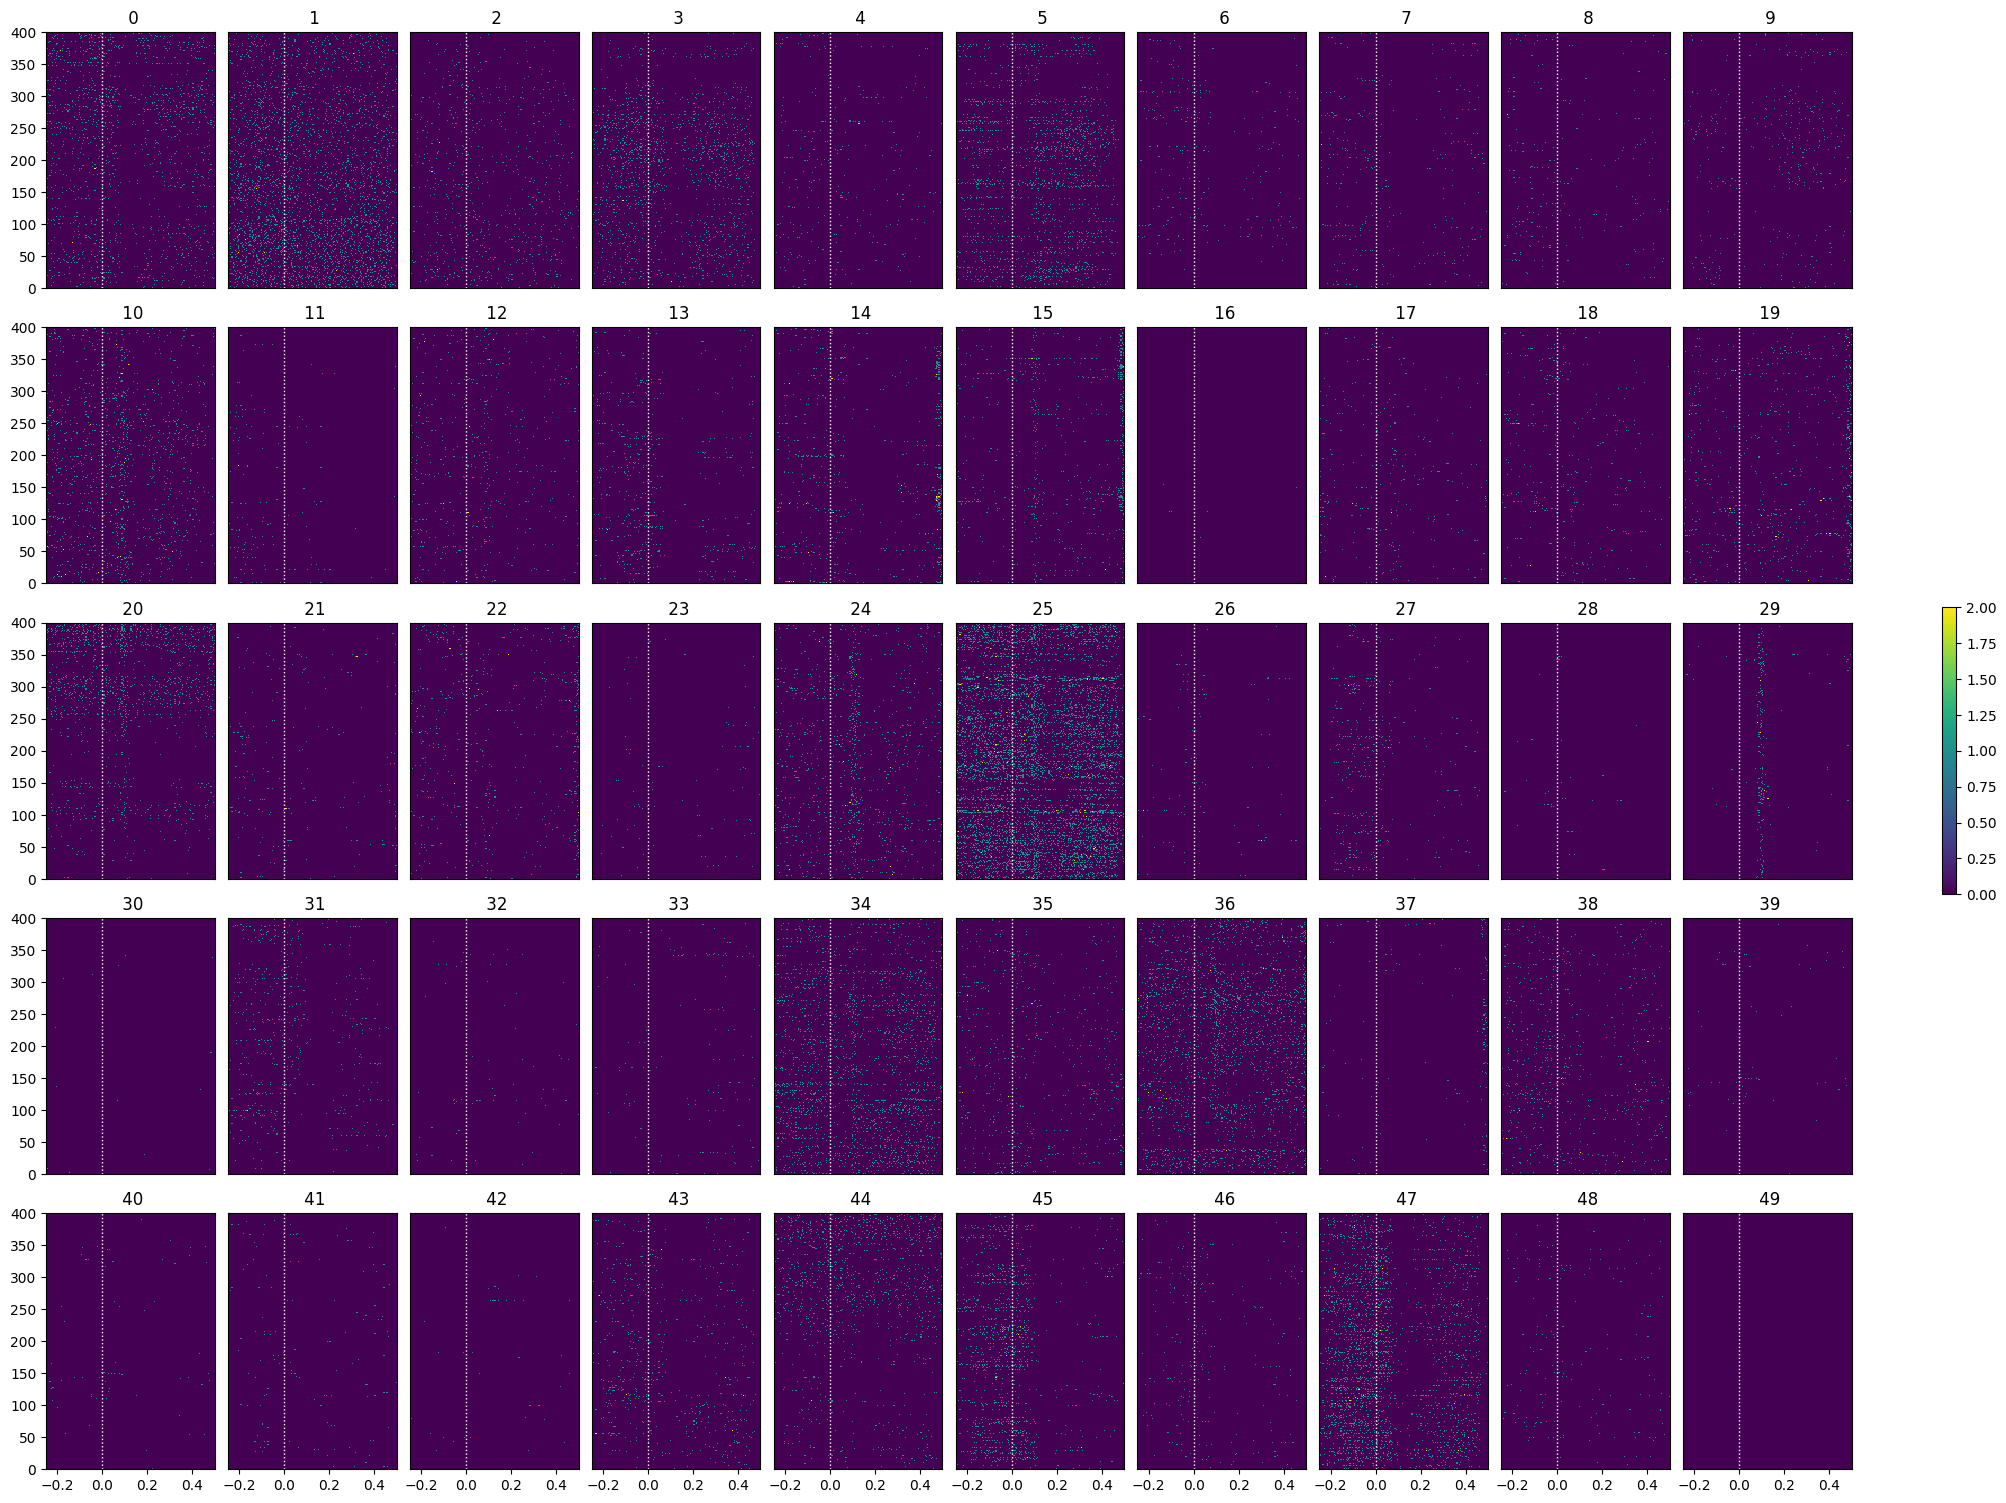

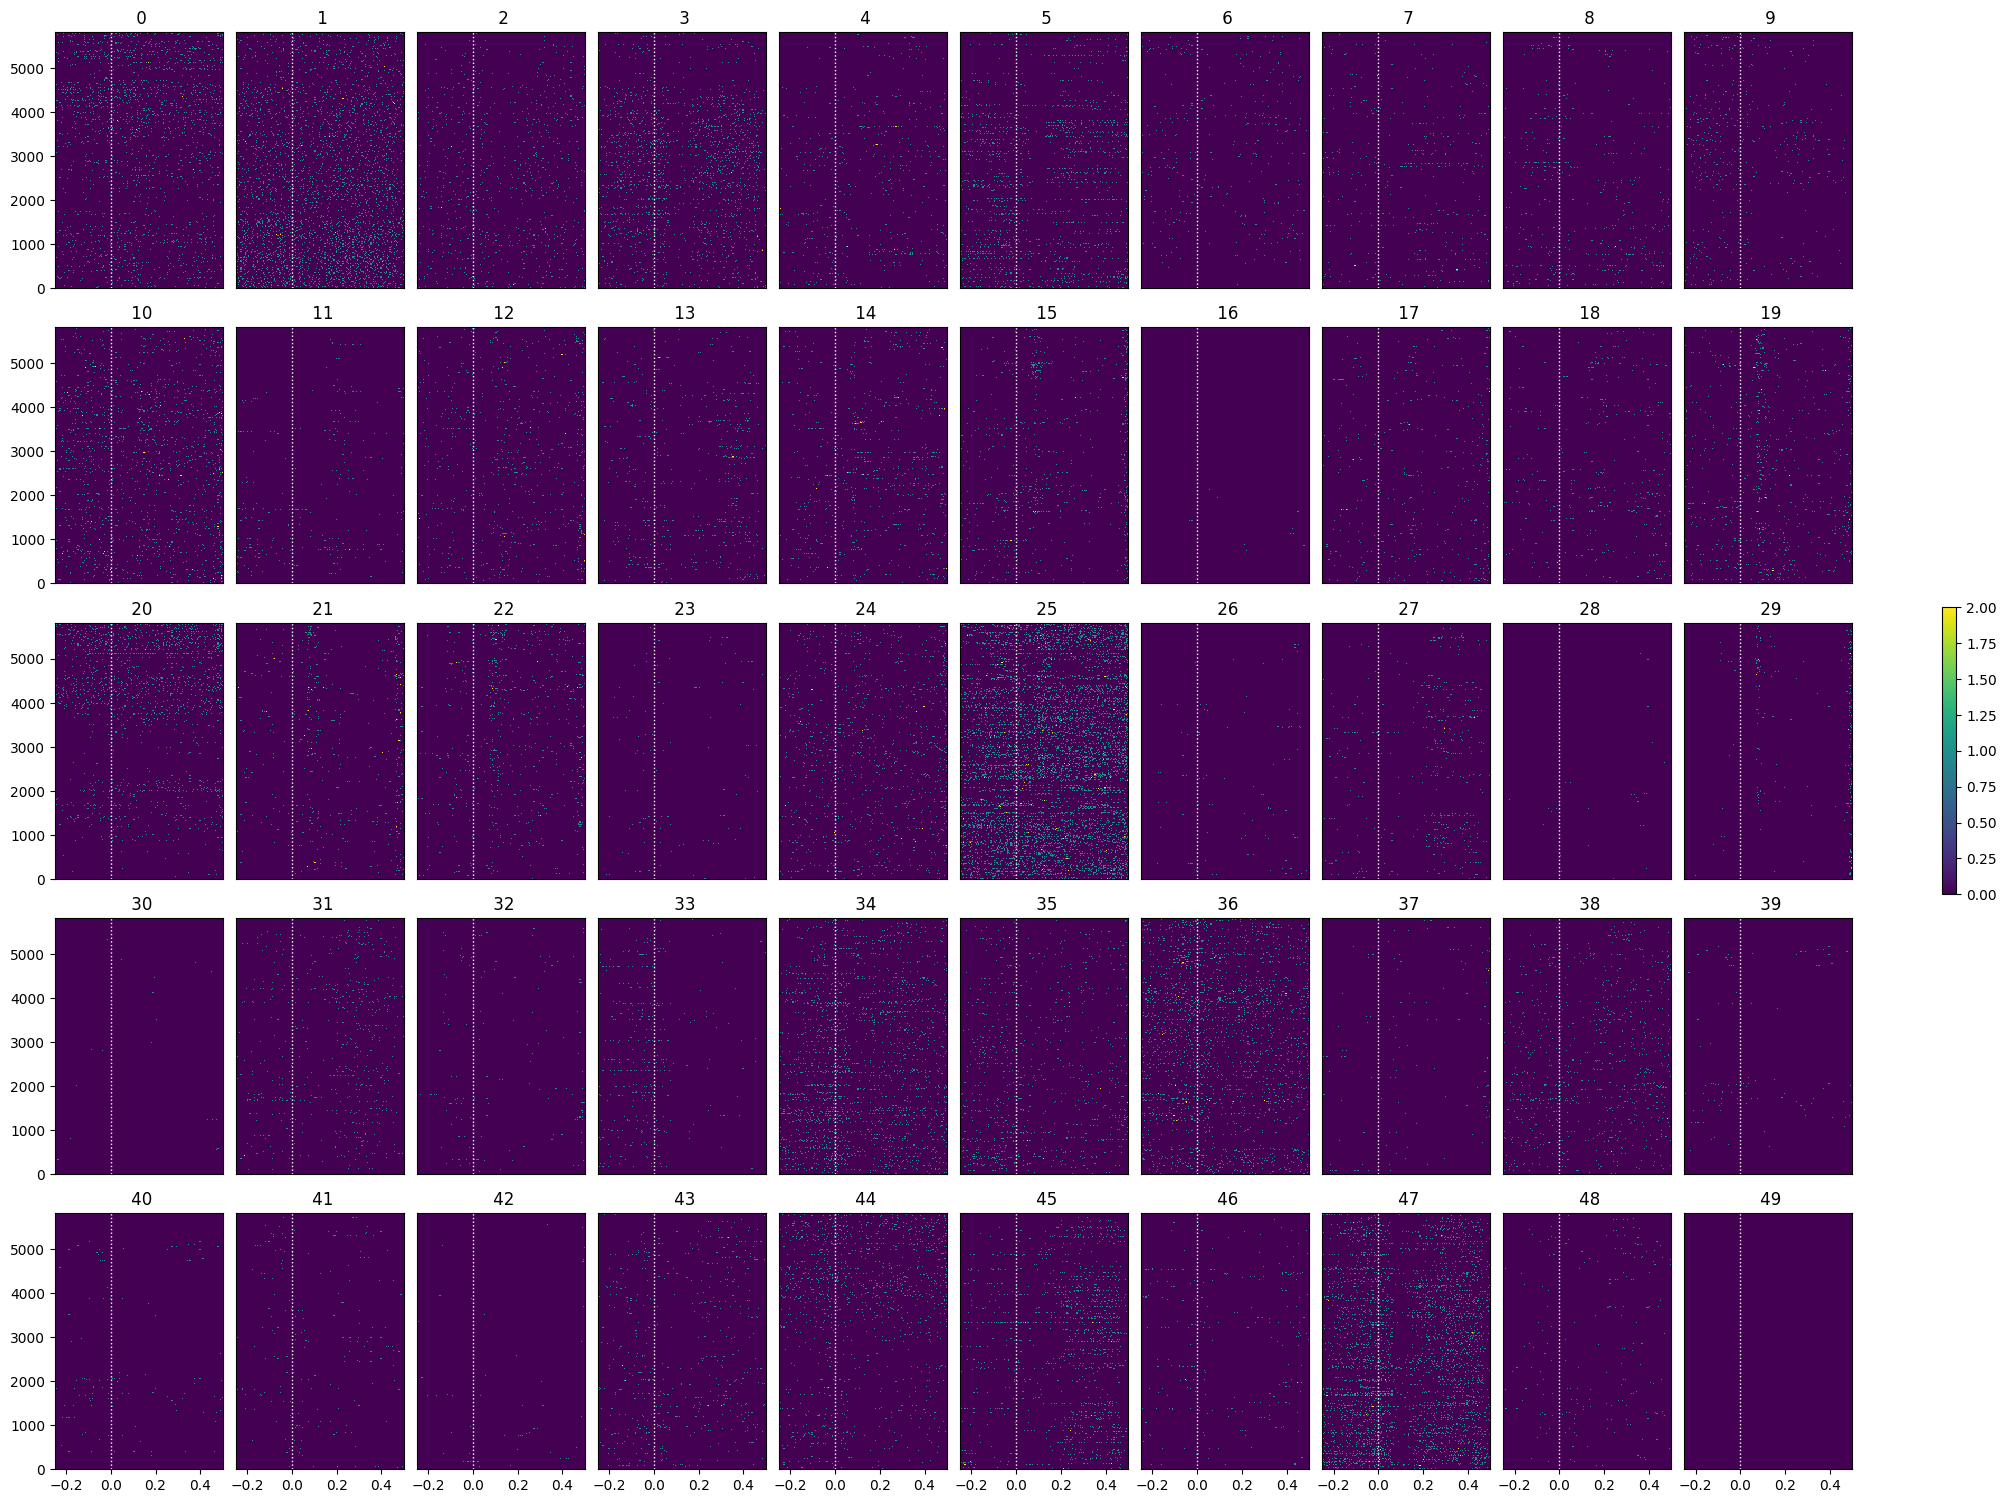

In [23]:
show_many_responses(illusion_spike_matrix, 5, 10)
show_many_responses(control_spike_matrix, 5, 10)

# Select Responsive cells

In [24]:
def select_cells(spike_matrix, stimulus_onset_idx):
    baseline_means = np.mean(spike_matrix[:,:,:stimulus_onset_idx], axis=2)
    mean_baseline_means = np.mean(baseline_means, axis=1)
    std_baseline_means = np.std(baseline_means, axis=1)

    response_means = np.mean(spike_matrix[:,:,stimulus_onset_idx:], axis=2)
    mean_response_means = np.mean(response_means, axis=1)

    unit_z_scores = (mean_response_means - mean_baseline_means) / std_baseline_means
    return np.where(np.logical_or(unit_z_scores > 1, unit_z_scores < -1))[0]

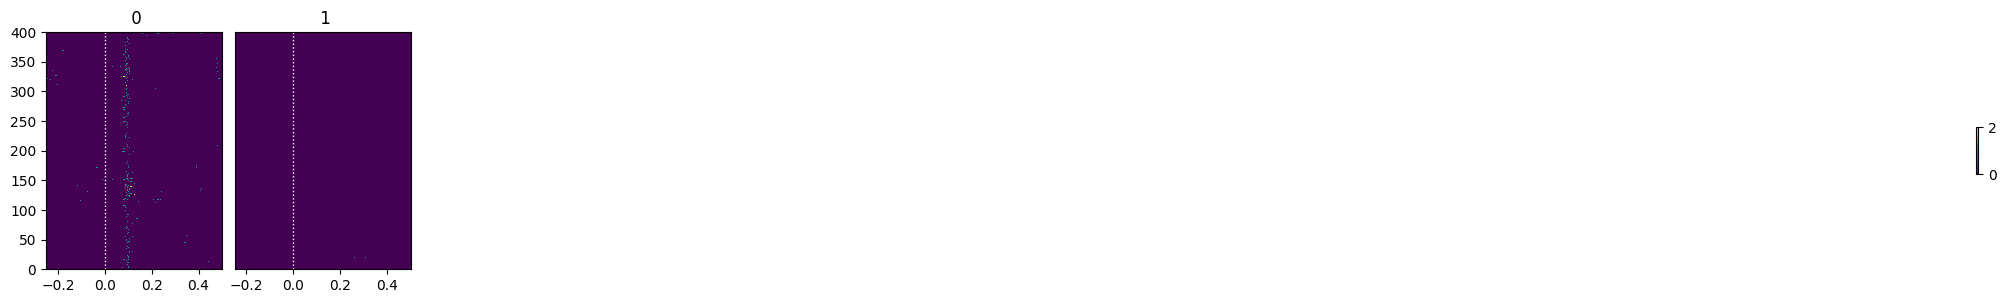

In [25]:
illusion_selected_idxs = select_cells(illusion_spike_matrix, stimulus_onset_idx)
show_many_responses(illusion_spike_matrix[illusion_selected_idxs], 5, 10)

In [26]:
print(illusion_selected_idxs)

[29 71]


In [27]:
def plot_psth(x, y, title="PSTH"):
    plt.figure(figsize = (6, 4))
    plt.plot(x, y, color='black', linewidth = 1)
    plt.xlabel("Time (s)")
    plt.ylabel("Firing rate (Hz)")
    plt.title(title)
    plt.axvline(0, color = 'r', linestyle = '--', label = 'stimulus onset')
    plt.legend()
    plt.show()

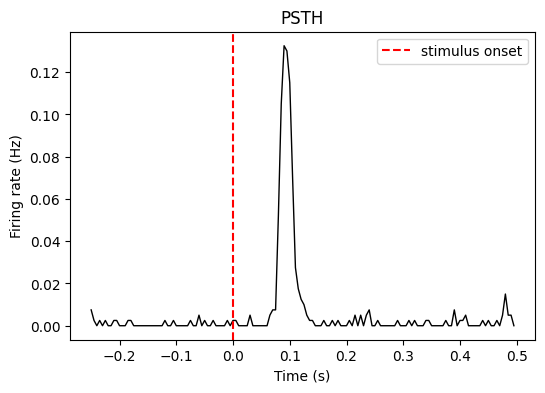

In [28]:
plot_psth(bin_edges[:-1], np.average(illusion_spike_matrix[29], axis=0))

# CCG

In [29]:
def CCG(bin_x, bin_y, Maxlag=0.1, dt=0.001):
    #ccg_mat : [lag] 
    N = len(bin_x)
    T = int(Maxlag/dt)
    lag_matrix = np.arange(-T, T + 1)
    std = 0
    ccg_mat = np.zeros(len(lag_matrix)) 
  
    lambdax = np.sum(bin_x)/N
    lambday = np.sum(bin_y)/N
    RMSnorm = (lambdax * lambday) ** 0.5
         
    if RMSnorm == 0 :
        ccg_mat = ccg_mat
        std = 0

    else:
        full_ccg = correlate(bin_x, bin_y, mode='full')
        center_idx = N - 1
        start_idx = center_idx - T
        end_idx = center_idx + T + 1
        ccg_mat = full_ccg[start_idx:end_idx].astype(float)
        for idx, tau in enumerate(lag_matrix):

            theta_tau = N - np.abs(tau)
            if theta_tau > 0:
                ccg_mat[idx] /= theta_tau
                ccg_mat[idx] /= RMSnorm
            else:
                ccg_mat[idx] = 0
  
    std = np.std(ccg_mat)
    
    return ccg_mat, lag_matrix, std

In [30]:
def plot_CCG(x, y, threshold = 0.1, title="CCG", y_low = 0, y_high = 1):
    plt.figure(figsize = (6, 4))
    plt.plot(x, y, color='black', linewidth = 1)
    plt.xlabel("lags (ms)")
    plt.ylabel("Efficiency (coincidence per spike)")
    plt.title(title)
    plt.axhline(threshold, color = 'r', linestyle = '--', label = 'threshold')
    plt.ylim(y_low, y_high)
    plt.legend()
    plt.show()

In [31]:
print(illusion_spike_matrix.shape)

(73, 400, 150)


[1.45355698 0.56589573 0.45887162 0.40427628 0.35063874 1.14208048
 2.1167871  2.63557034 2.51644852 2.20738244 1.33242723 0.5663209
 0.32764604 0.23213018 0.23025816 0.09136644 0.09064131 0.0449638
 0.         0.         0.04392617 0.04359086 0.08652125 0.
 0.12784483 0.         0.12596476 0.12504531 0.         0.
 0.08157718 0.         0.0804282  0.         0.07931114 0.
 0.07822469 0.1553851  0.         0.         0.03806935 0.03832485
 0.         0.03884627 0.         0.         0.         0.07986577
 0.0402141  0.         0.         0.04108203 0.         0.04168177
 0.04198825 0.         0.         0.17174143 0.04326062 0.04359086
 0.04392617 0.08853337 0.         0.         0.04532065 0.
 0.         0.18570414 0.         0.09438682 0.04758669 0.09597315
 0.04839324 0.         0.09845521 0.29793404 0.1001825  0.1516036
 0.         0.05144507 0.        ]
(81,)


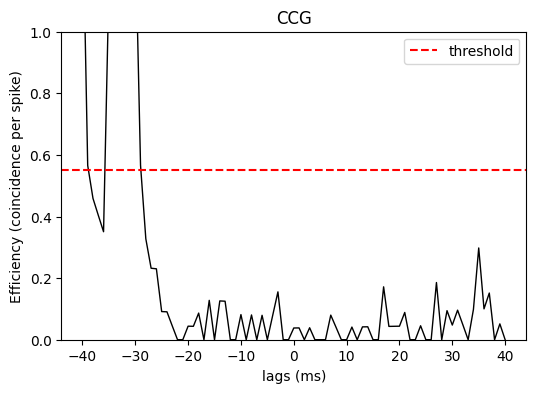

In [32]:
a = np.sum(illusion_spike_matrix[29], axis = 0)
aa = np.sum(illusion_spike_matrix[71], axis = 0)
A = a+aa
b = np.sum(illusion_spike_matrix[71], axis = 0)
ccgs, lags, std = CCG(a, b, Maxlag = 0.2, dt = 0.005)
print(ccgs)
print(ccgs.shape)
plot_CCG(lags, ccgs, std)

In [33]:
print(illusion_spike_matrix[51][20][:])

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0.]
